In [37]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [38]:
N=25
ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5e-3*ec/(6.62e-34)
w_a=2*np.pi*1.5e-3*ec/(6.62e-34)
w_p=2*np.pi*1.5e-3*ec/(6.62e-34)
g=(1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e-12/h
gamma=0.001e-12/h
alpha=0.75*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=50:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.01
tlist=np.array(tlist)

In [39]:
output=qload('output CAD-1 E1.2 phonon_5K')

In [40]:
result=qload('output CAD-1 wignerE1.2 phonon_5K')

In [41]:
No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
rho1=ket2dm(phi_expected)
fida=result.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)

In [42]:
def d_drive(tlist,args):
  
    f=0  
    s=0
    p=0
    t_drive=np.array([0.1e-12,1.00e-11])
   
    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=((((1.2)*np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[0]))
        #print(s)
    return f
o=[]
for i in range(0,len(tlist)):
    g=d_drive(tlist[i],0)
    o.append(g.real)

In [43]:
import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM=[]
U=0   
while U<10:
    ggM.append(fida1[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1[i-5]+fida1[i-4]+fida1[i-3]+fida1[i-2]+fida1[i-1]+fida1[i])/6
    ggM.append(gg)
print(len(tlist),len(ggM)) 

[5.73216996e-03 2.28811735e+12 7.56497886e-08]
5001 5001


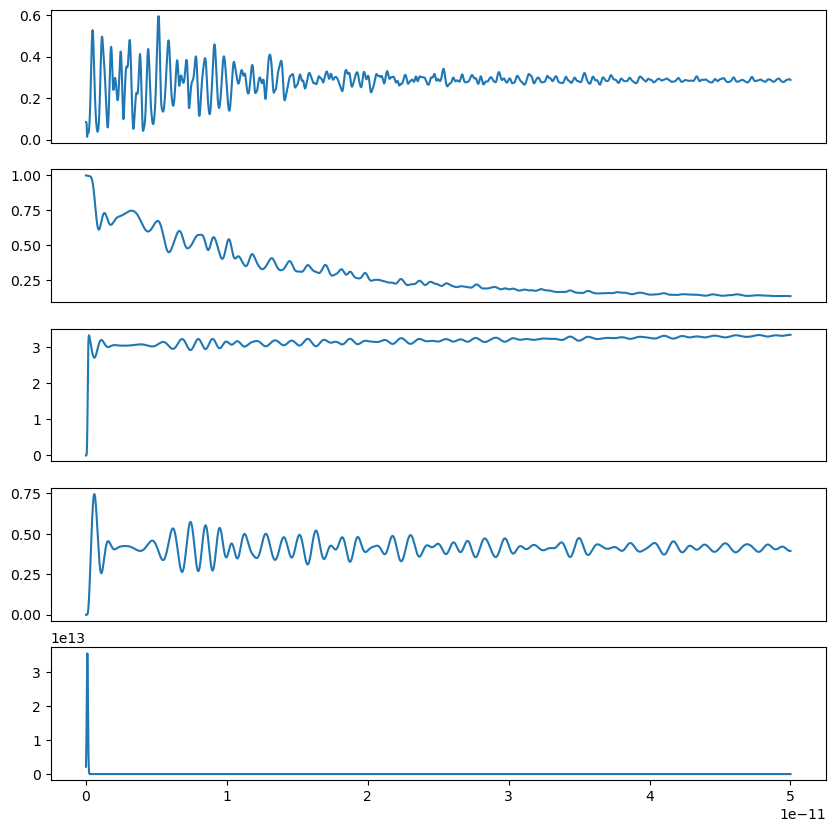

In [44]:
p=[]
for i  in range(0,len(tlist)):
    v=result.states[i]
    v=ptrace(v,0)
    #v=np.array(v)
    r=v*v
    trace=r.tr()
    p.append(trace)
p=np.array(p)
fig=plt.figure(figsize=(10,10))
n_c=output.expect[0]
n_a=output.expect[1]
axes=fig.add_subplot(513)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(514)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(511)
line_c=axes.plot(tlist,ggM,'')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(515)
line_c=axes.plot(tlist,o)
axes=fig.add_subplot(512)
line_c=axes.plot(tlist,p)
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
plt.show()

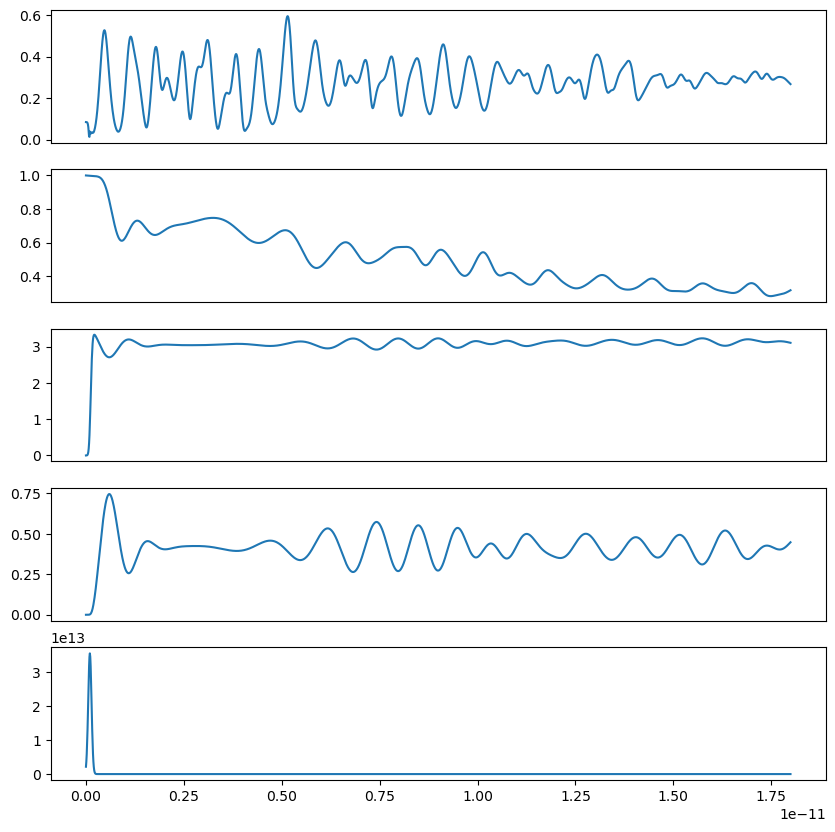

In [45]:
a,b,c,d,e,t=[],[],[],[],[],[]
for i in range(0,1800):
    a.append(ggM[i])
    b.append(p[i])
    c.append(n_c[i])
    d.append(n_a[i])
    e.append(o[i])
    t.append(tlist[i])

fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(513)
line_c=axes.plot(t,c,label='cavity ')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(514)
line_a=axes.plot(t,d,label='dot excited state')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(511)
line_c=axes.plot(t,a,'')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(515)
line_c=axes.plot(t,e)
axes=fig.add_subplot(512)
line_c=axes.plot(t,b)
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
plt.show()


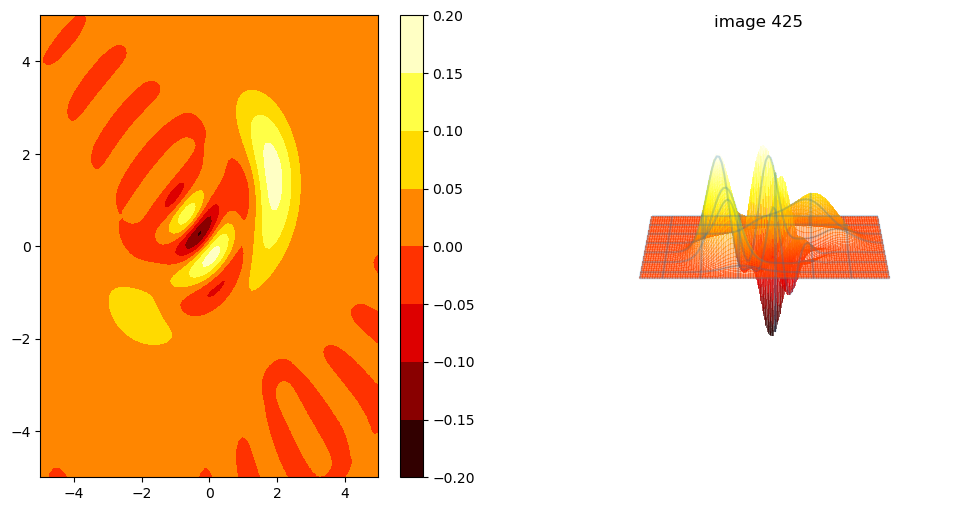

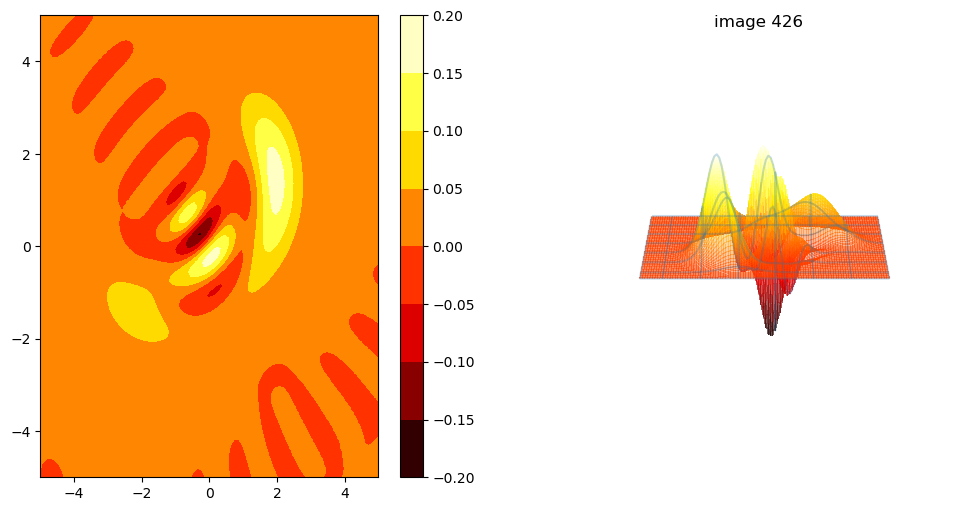

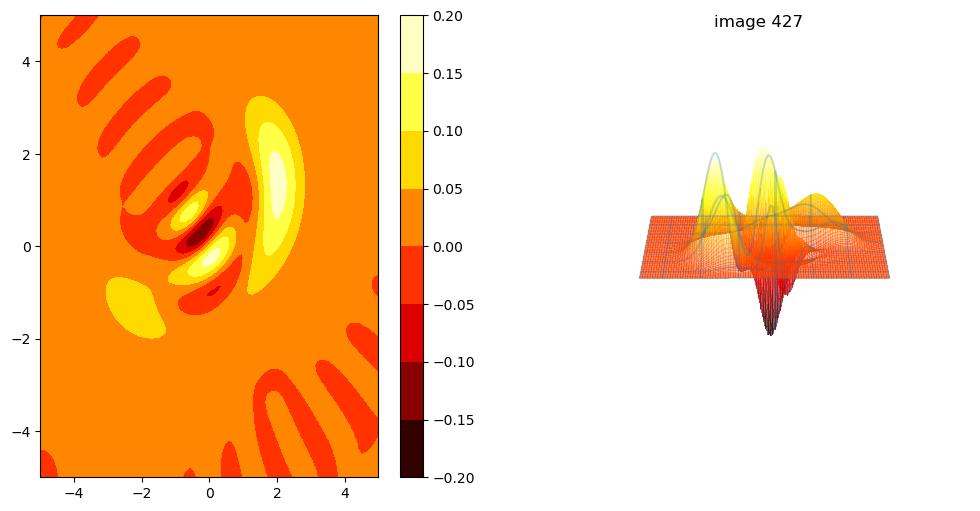

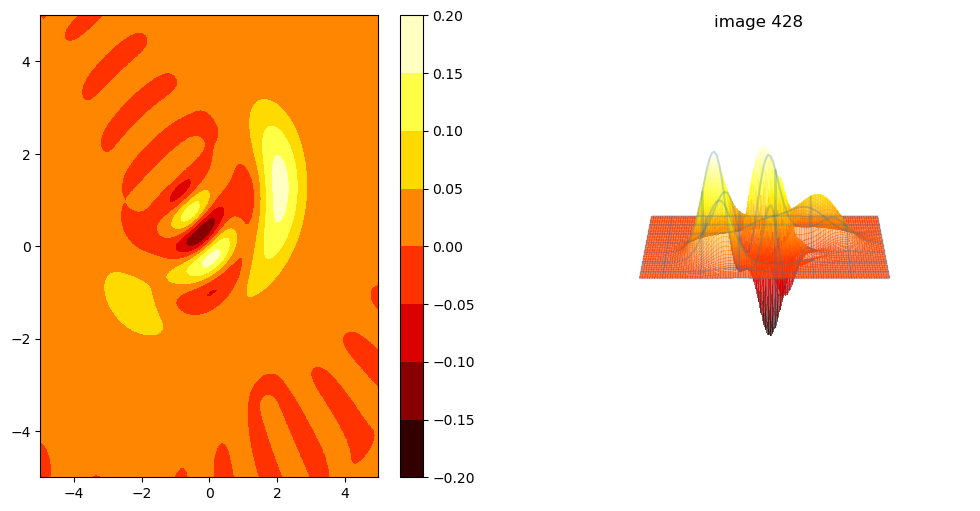

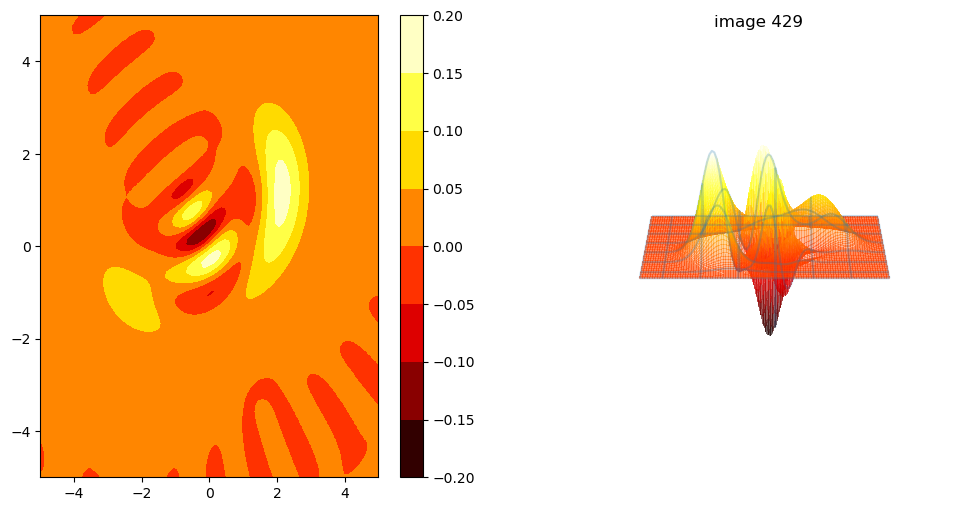

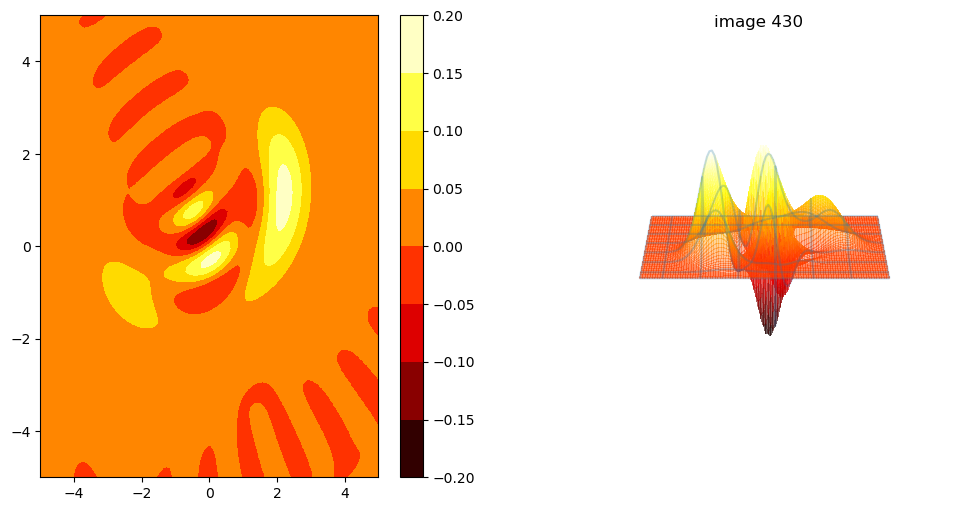

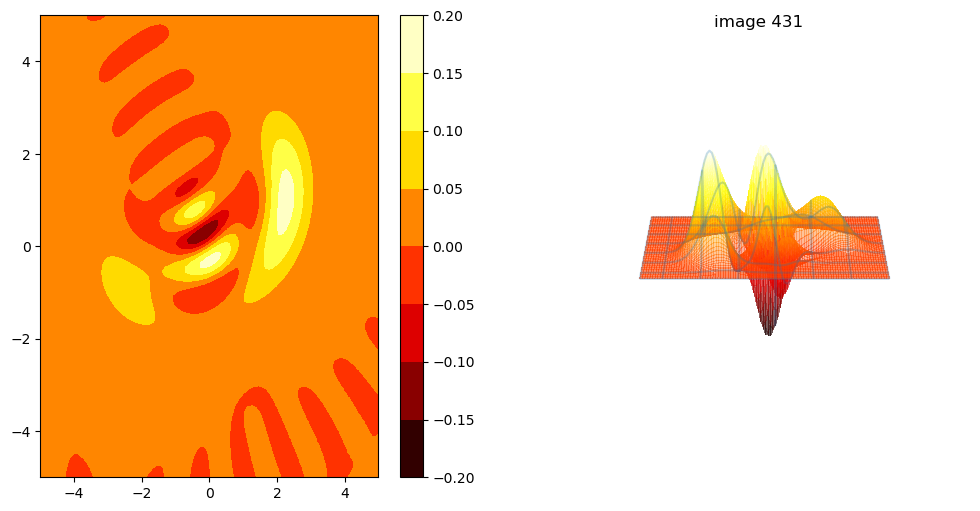

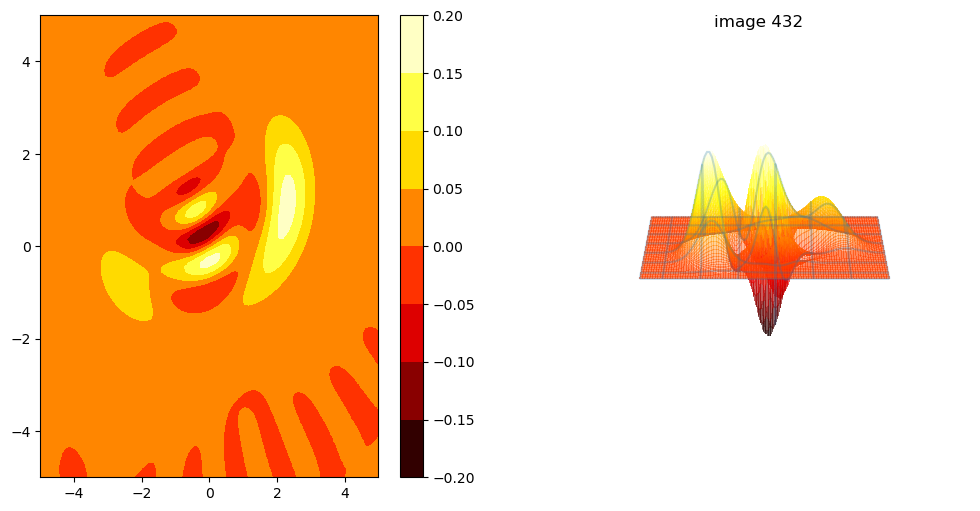

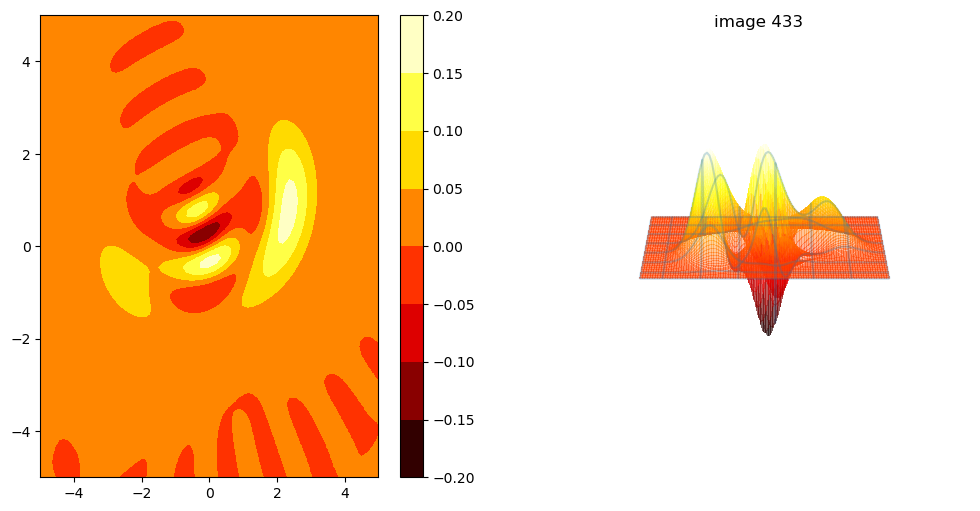

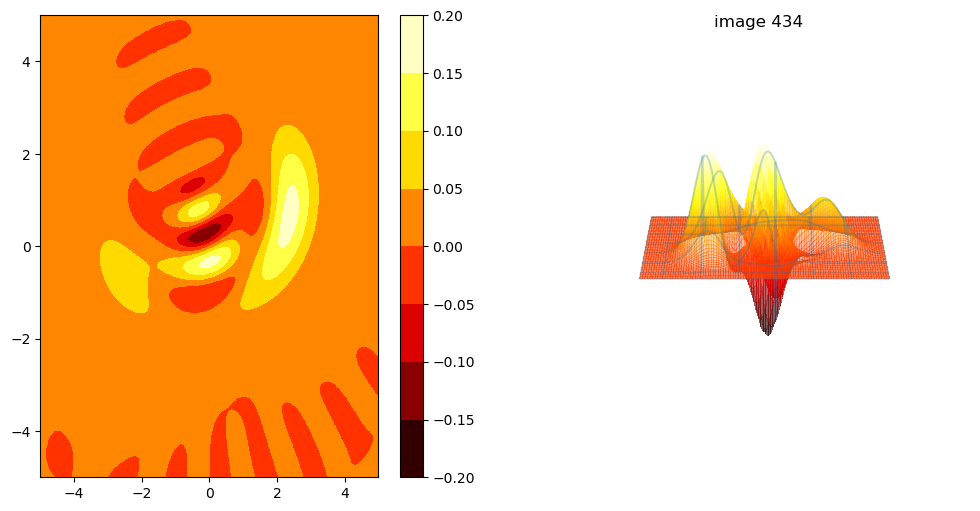

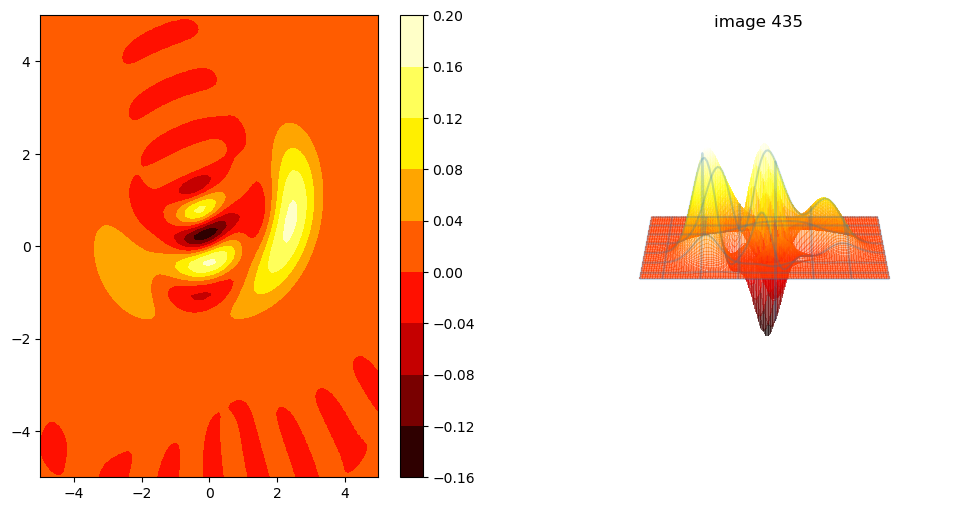

In [46]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,6),facecolor='none')
    axes1=fig.add_subplot(121)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    xvec=np.linspace(-2,2,100)
    X,Y=np.meshgrid(xvec,xvec)
    axes1=fig.add_subplot(122,projection='3d')
    
    dia=axes1.plot_surface(X,Y,W,rstride=1,cstride=1,antialiased=False,cmap='hot',alpha=0.40)
    dia=axes1.plot_wireframe(X,Y,W,rstride=15,cstride=15,antialiased=True,cmap='hot',alpha=.25)
    
    axes1.view_init(15,90)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    axes1.axis('off')
    
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number')
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)
X,Y=np.meshgrid(xvec,xvec)

for i in range(425,436,1):
    
    wigner_plot_steadystate(result.states[i],xvec,i)
